# HW3 Predict the Stock
E94041173 張竣佑

In [75]:
import pandas as pd
from sklearn import preprocessing
train_data = pd.read_csv('./training_data.csv')
test_data = pd.read_csv('./testing_data.csv')
print(train_data.head())
print(test_data.head())

          Date  Open Price  Close Price  High Price  Low Price      Volume
0  02-Jan-2009      902.99       931.80      934.73     899.35  4048270080
1  05-Jan-2009      929.17       927.45      936.63     919.53  5413910016
2  06-Jan-2009      931.17       934.70      943.85     927.28  5392620032
3  07-Jan-2009      927.45       906.65      927.45     902.37  4704940032
4  08-Jan-2009      905.73       909.73      910.00     896.81  4991549952
          Date  Open Price  Close Price  High Price  Low Price      Volume
0  02-Jan-2018     2683.73      2695.81     2695.89    2682.36  1846463232
1  03-Jan-2018     2697.85      2713.06     2714.37    2697.77  2090595328
2  04-Jan-2018     2719.31      2723.99     2729.29    2719.07  2100767744
3  05-Jan-2018     2731.33      2743.15     2743.45    2727.92  1918869120
4  08-Jan-2018     2742.67      2747.71     2748.51    2737.60  1894823936


### Prepare Data

In [111]:
import numpy as np
x_train = train_data.drop('Date',axis=1)
x_test = test_data.drop('Date',axis=1)
def Get_label(data):
    label_list = list()
    for i in range(len(data)-1):
        if data['Close Price'][i+1]-data['Close Price'][i] >= 0:
            label_list.append(1)
        else:
            label_list.append(0)
    return np.array(label_list)
# y_train = Get_label(x_train['Close Price'])   
# y_test = Get_label(x_test['Close Price'])
y_train = Get_label(x_train)   
y_test = Get_label(x_test)
# x_train['TODAYwinloss'] = np.hstack((0,y_train))
# x_test['TODAYwinloss'] = np.hstack((0,y_test))
x_train = x_train[:-1]
x_test = x_test[:-1]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
# x_train = preprocessing.normalize(x_train)
# x_test = preprocessing.normalize(x_test)

(2263, 5)
(251, 5)
(2263,)
(251,)


In [112]:
print(x_train[:5],y_train[:5])
print(x_test[:10],y_test[:10])

   Open Price  Close Price  High Price  Low Price      Volume
0      902.99       931.80      934.73     899.35  4048270080
1      929.17       927.45      936.63     919.53  5413910016
2      931.17       934.70      943.85     927.28  5392620032
3      927.45       906.65      927.45     902.37  4704940032
4      905.73       909.73      910.00     896.81  4991549952 [0 1 0 1 0]
   Open Price  Close Price  High Price  Low Price      Volume
0     2683.73      2695.81     2695.89    2682.36  1846463232
1     2697.85      2713.06     2714.37    2697.77  2090595328
2     2719.31      2723.99     2729.29    2719.07  2100767744
3     2731.33      2743.15     2743.45    2727.92  1918869120
4     2742.67      2747.71     2748.51    2737.60  1894823936
5     2751.15      2751.29     2759.14    2747.86  1957263872
6     2745.55      2748.23     2750.80    2736.06  2048867328
7     2752.97      2767.56     2767.56    2752.78  1978592384
8     2770.18      2786.24     2787.85    2769.64  2108422

### LOGISTICREGRESSION

# 使用五天的open_price、close_price共10個值當features

In [113]:
close_price_tr = x_train['Close Price']
open_price_tr = x_train['Open Price']
close_price_te = x_test['Close Price']
open_price_te = x_test['Open Price']
LG_x_train = list()
LG_y_train = list()
LG_x_test = list()
LG_y_test = list()
for i in range(len(close_price_tr)-9):
    cp_tr = close_price_tr[i:i+10]
    op_tr = open_price_tr[i:i+10]
    combine_tr = np.hstack((cp_tr,op_tr))
    LG_x_train.append(combine_tr)
    LG_y_train.append(y_train[i+9])
for i in range(len(close_price_te)-9):
    cp_te = close_price_te[i:i+10]
    op_te = open_price_te[i:i+10]
    combine_te = np.hstack((cp_te,op_te))
    LG_x_test.append(combine_te)
    LG_y_test.append(y_test[i+9])
        
LG_x_train = np.array(LG_x_train)
LG_y_train = np.array(LG_y_train)
LG_x_test = np.array(LG_x_test)
LG_y_test = np.array(LG_y_test)

print(LG_x_test.shape,LG_x_train.shape,LG_y_test.shape,LG_y_train.shape)

(242, 20) (2254, 20) (242,) (2254,)


# 原本只使用一天的資料當features

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression()
clf.fit(x_train,y_train)
prediction = clf.predict(x_test)
print(accuracy_score(y_test,prediction))

0.5258964143426295


# 使用五天資料的預測模型

In [115]:
clf2 = LogisticRegression()
clf2.fit(LG_x_train,LG_y_train)
prediction = clf2.predict(LG_x_test)
print(accuracy_score(LG_y_test,prediction))

0.5041322314049587


### SVM

## 整理資料

In [116]:
# SVM_cp = train_data['Close Price']
# SVM_y_train = SVM_cp[1::]
SVM_y_train = np.array(y_train)
SVM_y_test = np.array(y_test)
SVM_x_train = x_train.drop('Volume',axis=1)
SVM_x_test = x_test.drop('Volume',axis=1)
SVM_x_train = np.array(SVM_x_train)
SVM_x_test = np.array(SVM_x_test)
SVM_y_train = np.array(SVM_y_train)
print(SVM_x_test.shape,SVM_x_train.shape,SVM_y_train.shape)
# for i in SVM_y_train:
#     print(type(i))

(251, 4) (2263, 4) (2263,)


In [117]:
from sklearn.svm import SVC
clf3 = SVC(C=0.5,kernel='rbf',probability=True)
clf3.fit(SVM_x_train,SVM_y_train)
# clf3.fit(LG_x_train,LG_y_train)
prediction = clf3.predict(SVM_x_test)
print(accuracy_score(SVM_y_test,prediction))

0.5258964143426295


### Neural Network

In [118]:
import keras
NN_x_train = np.array(x_train)
NN_x_test = np.array(x_test)
NN_y_train = np.array(y_train)
NN_y_train = keras.utils.to_categorical(NN_y_train,2)
NN_y_test = np.array(y_test)
NN_y_test = keras.utils.to_categorical(NN_y_test,2)
print(NN_x_test.shape,NN_x_train.shape,NN_y_train.shape,NN_y_test.shape)

(251, 5) (2263, 5) (2263, 2) (251, 2)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 8)                 48        
_________________________________________________________________
dropout_101 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_127 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_102 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_128 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_103 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_129 (Dense)            (None, 8)                 136       
__________

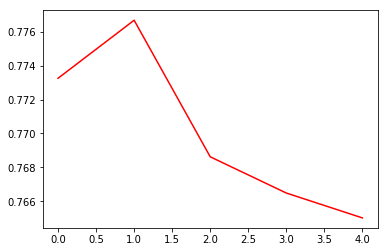

In [121]:
import keras
from sklearn import preprocessing
from keras.models import Sequential      ###模型選擇###
from keras.layers import Dense,Dropout   ###用於定義神經網路層###
from keras.optimizers import Adam     ###選擇優化器###
from keras.layers import BatchNormalization 
from keras.layers import Conv1D,MaxPooling1D,Flatten
import matplotlib.pyplot as plt
###---###
NN_x_train = preprocessing.normalize(NN_x_train)
NN_x_test = preprocessing.normalize(NN_x_test)
###---------建構模型--------###
model = Sequential()                                              ###TOBEDEFINE選擇原因###
model.add(Dense(8,activation = 'relu',input_shape = (5,)))    ###建構第一層輸入層###
model.add(Dropout(0.2))                                           ###防止OVERFITTING捨棄0.2%的層數###
model.add(Dense(16,activation = 'relu'))                         ###建構隱藏層###
model.add(Dropout(0.2)) 
model.add(Dense(16,activation = 'relu'))                         ###建構隱藏層###
model.add(Dropout(0.2)) 
model.add(Dense(8,activation = 'relu'))                         ###建構隱藏層###
model.add(Dropout(0.2)) 
model.add(BatchNormalization())
model.add(Dense(2,activation = 'softmax'))                       ###輸出層###
model.summary()
###-------調整模型參數-------###
model.compile(loss = 'categorical_crossentropy',                  ###LOSS FUNCTION使用一般CROSSRNTROPY###
             optimizer = Adam(lr=0.1),                               ###優化器###
             metrics = ['accuracy'])                              ###準確率使用accuracy###

class_weight = {
    0: 1.,
    1: 1239 / 1025
}
###---------training---------###
history = model.fit(NN_x_train,NN_y_train,batch_size = 8,epochs = 5,verbose = 1, ###fitting data###
         validation_data = (NN_x_test,NN_y_test),class_weight=class_weight)
'''
batch_size = 64 --> 每次訓練丟64張圖片
epochs = 2 --> 訓練2輪
verbose = 1 --> 選擇輸出訊息方式,0不輸出,1一直輸出更新,2每個epoch輸出一次
'''

###---------計算score---------###

score = model.evaluate(NN_x_test,NN_y_test,verbose = 1)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

###------done the mission------###
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()